### Friction

In depth-averaged models like ADCIRC and XBeach, the dimensionless friction coeffcient $c_f$ relates bed stress $\tau$ [Pa] to depth mean current speed $U$ [m/s]. In ROMS,  $c_d$ relates $\tau$ to $u$ at a specified elevation $z_r$ [m].

Friction velocity $u^{*}$ [m/s] is the square root of kinematic stress $\tau / \rho$ [m^2 s^-2], where $\rho$ [kg/m^3] is water density.

Depth-averaged flow: $\tau$ = $c_f \rho U^2$ 

Flow with a log profile: $\tau = c_d u^2 = \rho u^{*2}$, where $c_d$ is linked with a specific $z_r$, e.g. 1 mab.

The law of the wall relates current speed to elevation as

$u = (u^{*}/\kappa) \text{log}(z/zo)$

Depth-mean flow can be calculated by integrating the velocity profile from zo to h, and dividing by h:

$U = (u*/\kappa)[log(h/zo)-1]$

The depth at which $U = u$ is $h/e$, so $U = u*/\kappa)log((h/e)/zo)$

Rearranging (2) to solve for $u^*$ and using (1) shows that

$c_f(zo) = [ \kappa / \text{log}(z/zo) ]^2 $ 

Note that this assumes that the

Mattock and Forbes use

$c_f(n) = gn^2/h^{1/3}$

to calculates stress from depth-mean flow velocity in ADCIRC. Note that, according to the XBeach manual, Manning's $n$ is:

$c_f(n) = [gn^2/h^{1/3}]^{1/2}$ , but I don't think the square root should there, and it is not in the XBeach code.

Solving for $n$ in terms of $zo$:

$n = [h^{1/3}/g]^{1/2} \kappa/\text{log}(z/zo)$

Solving for $zo$ in terms of $n$:

$zo = \text{exp}[ -\kappa/(gn^2/h^{1/3})^2 + \text{log}(z) ]$

In [47]:
# check these formulae
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = 10.
g = 9.81
vk = 0.41
zr = 1.
zo = 0.002

cd_zo = (vk/np.log(zr/zo))**2
print('cd_zo = ',cd_zo)

n = np.sqrt(h**(1./3.)/g) * vk/np.log(zr/zo)
print('n from zo = ',n)

cd_n  = g*n**2/h**(1./3.)
print('cd_n from n = ',cd_n)

zor = np.exp( np.log(zr)-vk*( g*n**2 / h**(1./3.))**(-1./2.) )

print('zo from n: ',zor)

cd_zo =  0.00435251443532
n from zo =  0.0309173507567
cd_n from n =  0.00435251443532
zo from n:  0.002


In [37]:
us = .05
ubar = us/vk * (np.log(h/zo)-1.)
print(ubar)

0.916730877002


In [55]:
z = np.logspace(np.log10(zo),np.log10(h),100) # note that the round-off error is still significant until the profile has 100K pts.
# print(z)
u = us/vk * np.log(z/zo)
# print(u)
dz = np.diff(z)
# print(dz)
ubar_num = np.sum( u[1:]*dz)/(h)
print('Numerical estimate of ubar: ',ubar_num)
ubar_ana = us/vk * np.log((h*1./(np.e))/zo)
print('Analytical value of ubar  : ', ubar_ana)

Numerical estimate of ubar:  0.921924892574
Analytical value of ubar  :  0.916730877002


0.36787944117144233
Analytical value of ubar:  0.916730877002


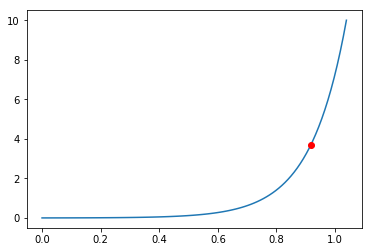

In [56]:
print(1./(np.e))

print('Analytical value of ubar: ',us/vk * np.log((h*1./(np.e))/zo) )

plt.plot(u,z)
plt.plot(ubar_ana,h/np.e,'or')